In [153]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10,6
import os
os.getcwd()
os.chdir('D:\\Python analysis')

In [300]:
data = pd.read_csv('AirPassengers.csv')
print (data.head())
print (data.tail())
print ('\n Data Types:')
print (data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121
       Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [302]:
data.Month = pd.to_datetime( data.Month, infer_datetime_format=True)

indexedts = data.set_index(['Month'])

indexedts.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [303]:
data.index
indexedts.index


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [304]:
indexedts.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0, 0.5, 'Number of Passenger for each Month')

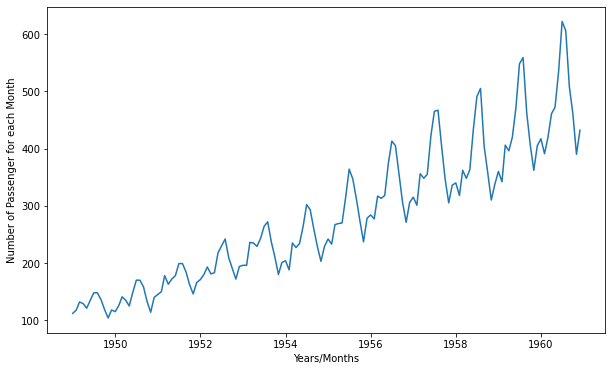

In [305]:
plt.plot(indexedts)
plt.xlabel('Years/Months')
plt.ylabel('Number of Passenger for each Month')
#It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations

In [306]:
# Determining Rolling Stat. for Testing the stationarity ===>

rolmean = indexedts.rolling(window=12).mean()
rolstd = indexedts.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


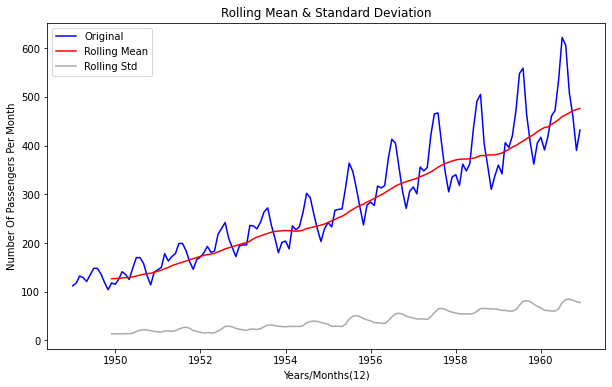

In [307]:

# plot rolling statistics for Testing the stationary of a series visually 

original_Series = plt.plot(indexedts, color='blue', label='Original')
mean_plot = plt.plot(rolmean, color='red', label='Rolling Mean')
std_plot = plt.plot(rolstd, color='darkgray', label='Rolling Std')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Years/Months(12)')
plt.ylabel('Number Of Passengers Per Month')

plt.show(block=False)

# From the following graph we can conclude that the mean and the std are not constant, they are vary over the time so the 
# series is not stationary.

In [114]:
# Dickey Fuller Test for checking the stationarity of a TS :

from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')

dftest = adfuller(indexedts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print (dfoutput)

# as shown in the adf test results Test Statistic value is greater than the critical value at (5%) so we accept the
# null Hypothesis (null hypothesis : the TS is not stationary)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


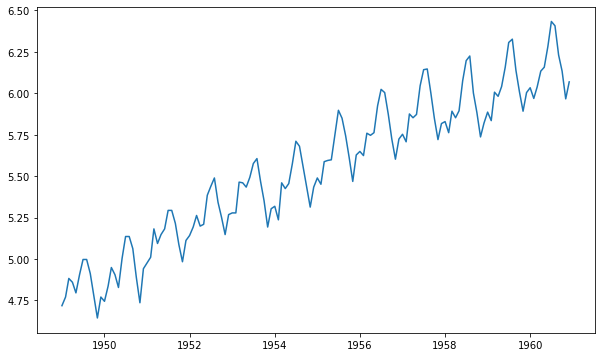

In [308]:
# Estimating and elimnating the mean trend using the smoothing techniques (rolling average & rolling std)
# there are 3 ways to model and remove the mean trend (aggregation(taking average of a time period like monthly/weekly),
# smoothing (rolling mean and std, polynomial fitting (fit a regression model))).

indexedts_logScale = np.log(indexedts)
plt.plot(indexedts_logScale)

# for the first while you will say nthn has changed, but we can notice that the variance has decreased considerably
# So we use log or square root as a smoothing techs. to get stationarize the std (or variance)


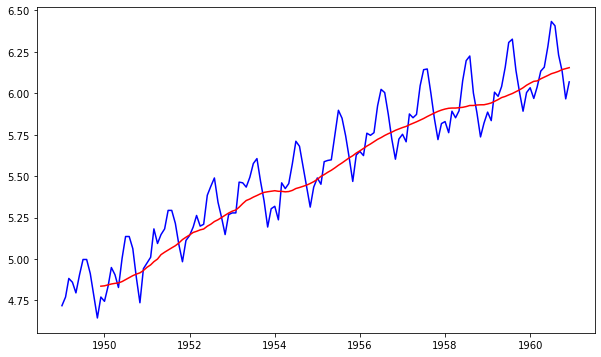

In [116]:

moving_Average = indexedts_logScale.rolling(window=12).mean()
moving_std = indexedts_logScale.rolling(window=12).std()
plt.plot(indexedts_logScale, color='blue')
plt.plot(moving_Average, color='red')
#plt.plot(moving_std, color='gray')

# when plotting MA we noteice that the upward trend in the mean still exist we will manipulate it by substracting ma from the TS
# that is indicate that the mean is not stationary yet
# when we look at Moving std we can see that there is a stability appeard on its pattern after taking the log.

Text(0.5, 1.0, 'Smoothing and removing the average Trend')

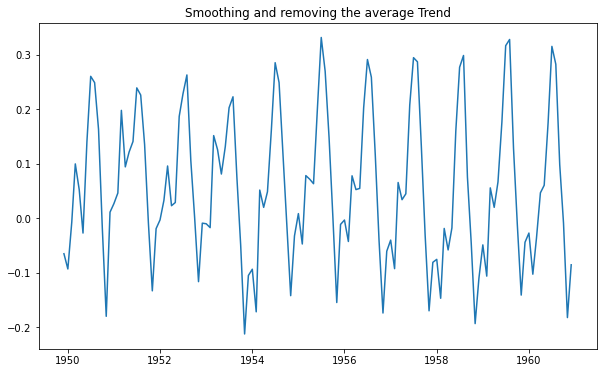

In [159]:
# now to remove or trying to remove the mean trend (pattern) we need to substract the MA from our TS


indexedts_logScale_woutMA = indexedts_logScale - moving_Average
indexedts_logScale_woutMA.dropna(inplace=True)  #removing the NaN from the series 
indexedts_logScale_woutMA.head(24)

plt.plot(indexedts_logScale_woutMA)
plt.title('Smoothing and removing the average Trend')
#plt.plot(moving_std, color='red', label='Moving Std')
#plt.plot(moving_Average, color='red')

In [118]:
# The whole Functuion to conduct the rolling statistics & Dickey fuller Test for checking if the series is stationary or not :
    
from statsmodels.tsa.stattools import adfuller

def test_stationarity(indexedts):
    
    # determing and rolling statistics:
    
    movingaverage = indexedts.rolling(window=12).mean()
    movingstd = indexedts.rolling(window=12).std()

    original_Series = plt.plot(indexedts, color='blue', label='Original')
    rolmean_plot       = plt.plot(movingaverage, color='red', label='Rolling Mean')
    rolstd_plot        = plt.plot(movingstd, color='darkgray', label='Rolling Std')

    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel('Years/Months(12)')
    plt.ylabel('Number Of Passengers Per Month')
    plt.show(block=False)
    

    #Perform Dickey-Fuller test:
    
    print ('Results of Dickey-Fuller Test:')

    dftest = adfuller(indexedts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print (dfoutput)



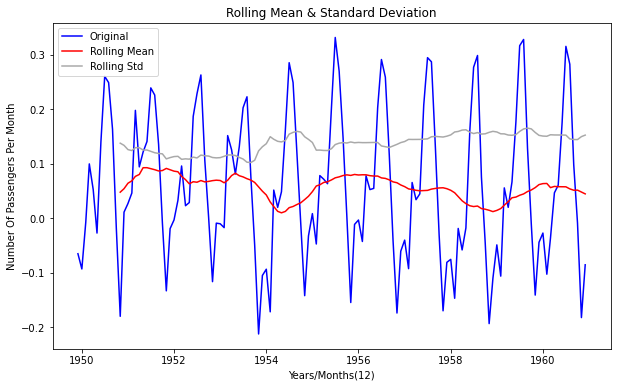

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [119]:
test_stationarity(indexedts_logScale_woutMA)
# after taking the log to minimize the std and doing the substracting of MA from the TS
# to minimize the mean trend the results show that the
# The p-value at (5%) is less than 5% so we reject the null H(the TS is not stat.), so the series is statioary now

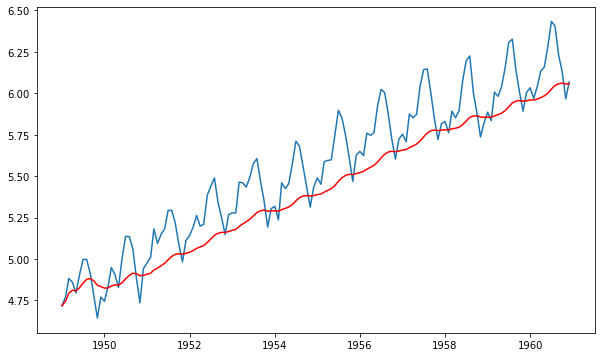

In [120]:
# now we need to calculate the weighted average of TS to see the trend that is present inside the TS 
# the first thing to do is substracting weighted mean from the TS and then we will check the stationarity

exponentialDecayWeightedAverage = indexedts_logScale.ewm(halflife=12, min_periods=0, adjust=True,).mean() 
plt.plot(indexedts_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

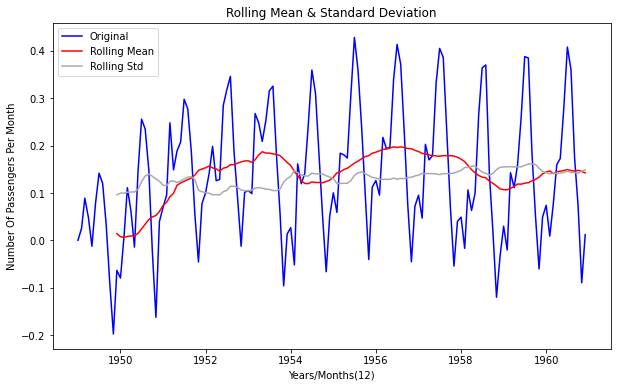

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [169]:
indexedts_logScaled_woutWeightedAverage = indexedts_logScale - exponentialDecayWeightedAverage
test_stationarity(indexedts_logScaled_woutWeightedAverage)
# from the following graph and DF test (rolling stst. & DF Test), we conclude that the Test stat. is less than the critical
# value, so we reject the null hypothesis that says the TS is not Stationary
# also the p-value is less than 0.05, so we reject the Ho, thats mean the TS is stationary.
# Ho : the TS is not stationary
# H1 : the TS is Stationary (if p-value < 0.05 we reject HO, & If Test Stat. < Critical value we reject HO).

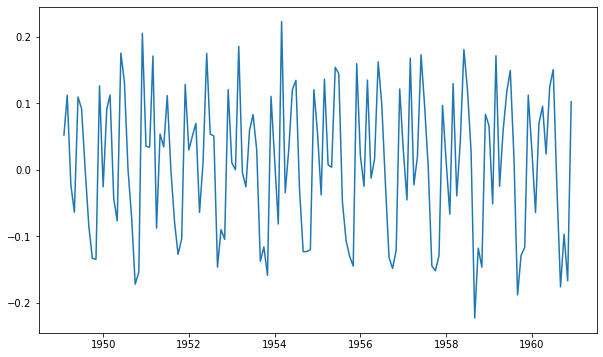

In [334]:
# the above techniques were to convert the TS into a stationary TS, now we need to start our forecasting, firstly we specify 
# d value, which represnt the number of differentiations.

diff_indexedts_logScale = indexedts_logScale - indexedts_logScale.shift(1)
plt.plot(diff_indexedts_logScale)

# we have diffrentiated the TS once, so the value of d is 1 now.

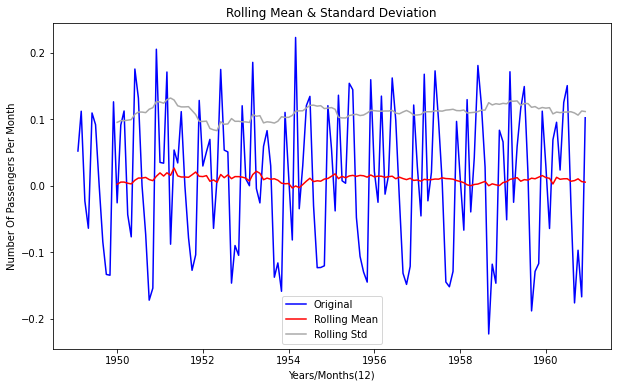

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [335]:
diff_indexedts_logScale.dropna(inplace=True)
test_stationarity(diff_indexedts_logScale)

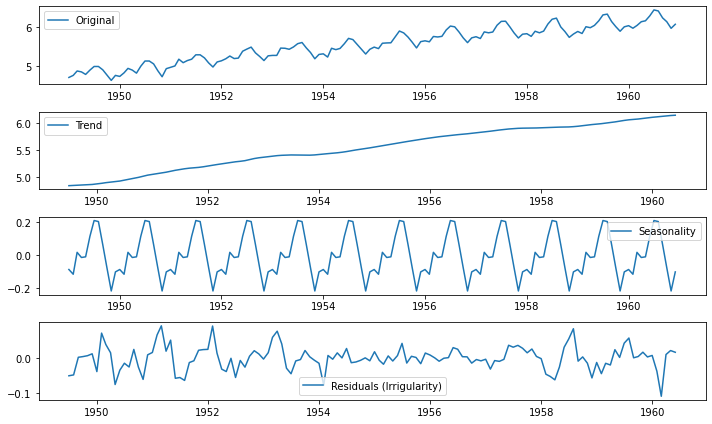

In [336]:
# The components of The TS (Trend, Seasonality, Residual(irregularity)) :

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(indexedts_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedts_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals (Irrigularity)')
plt.legend(loc='best')

plt.tight_layout()



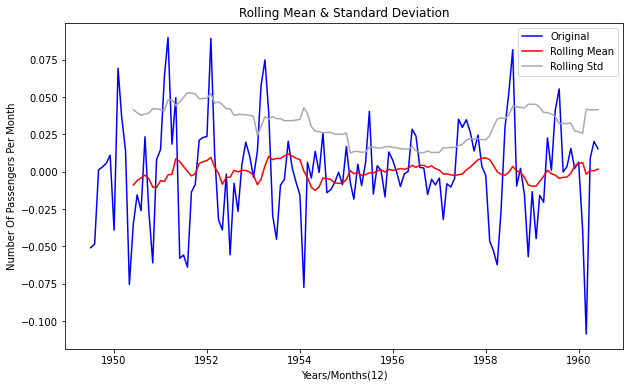

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [125]:
# now we need to check if the residuals are stationary or not 
indexedts_log_decompose = residual
indexedts_log_decompose.dropna(inplace=True)
test_stationarity(indexedts_log_decompose)

# from the results below we find that the residuals (Noise) are not stationary and the irregularity is present in
# our data (residual) and this is what we need for the residual to be.

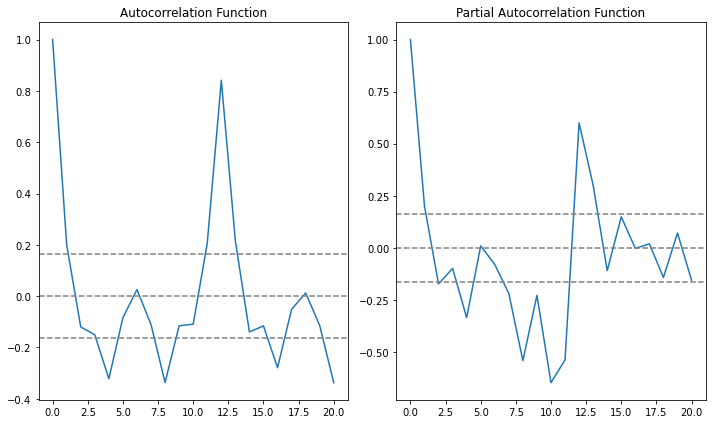

In [126]:
# We know that the D value is (1), as we have done one diffrentiate befor, but now to determine the value of P & Q 
# we need to calculate the ACF & The PACF 
from statsmodels.tsa.stattools import acf, pacf 

lag_acf = acf(diff_indexedts_logScale, nlags=20)
lag_pacf = pacf(diff_indexedts_logScale, nlags=20, method='ols') #ordinary least square method.

# Plot ACF 
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff_indexedts_logScale)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff_indexedts_logScale)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# Plot PACF 
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff_indexedts_logScale)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff_indexedts_logScale)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


# from the two graphs below we can exract the p and q values, whereas the p value it is when the line cut off with the upper
# limit of the CI in the PACF graph. which is p=2 (when the value cut off the line and drop to zero)
# while the q value is when the line cut off the upper limit of the CI in the ACF graph, which is q=2.

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


pandas.core.series.Series

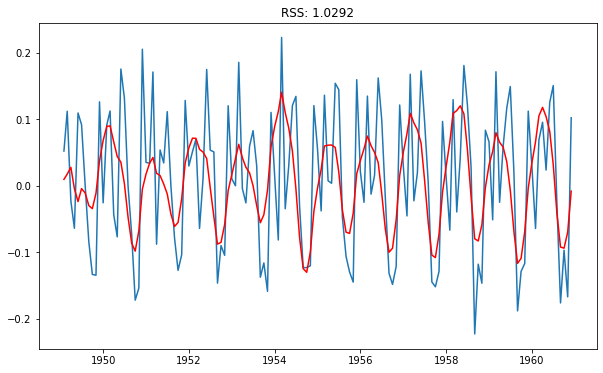

In [355]:
# Building the ARIMA Model and determing p, d, q values, and Testing the Model 

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexedts_logScale, order=(2, 1, 2))
results_ARIMA = model.fit()
plt.plot(diff_indexedts_logScale)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-diff_indexedts_logScale['#Passengers'])**2))

type(diff_indexedts_logScale['#Passengers'])

In [356]:
# Here we converted the predictions values into series format

predictions_ARIMA_log_diff = pd.Series(result_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_log_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [357]:
# find the cumulative sum  whereas the cumulative process is the oppisite of the diffrencing so as we subtract t from t-1
# we need to re sum these lags againg using cumsum method

predictions_ARIMA_log_cums = predictions_ARIMA_log_diff.cumsum()
predictions_ARIMA_log_cums.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [375]:
# Here we get rid of the difference 
ts=indexedts_logScale['#Passengers']
pred_ARIMA_logScale = pd.Series(ts[0], index=indexedts_logScale.index)
pred_ARIMA_logScale = pred_ARIMA_logScale.add(predictions_ARIMA_log_cums, fill_value=0)
pred_ARIMA_logScale.head()
#plt.plot(pred_ARIMA_logScale)

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

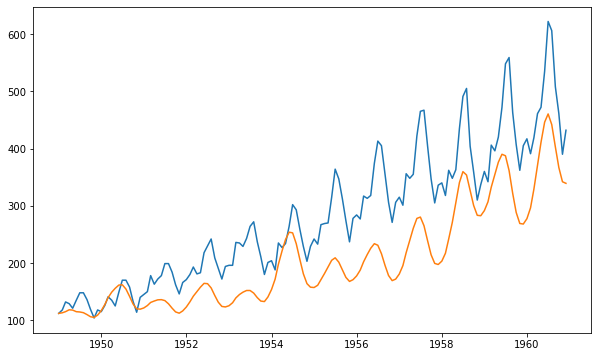

In [379]:
# Here we need to get rid of the log by using exp method 

predictions_ARIMA = np.exp(pred_ARIMA_logScale)
plt.plot(indexedts)
plt.plot(predictions_ARIMA)

In [380]:
indexedts_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


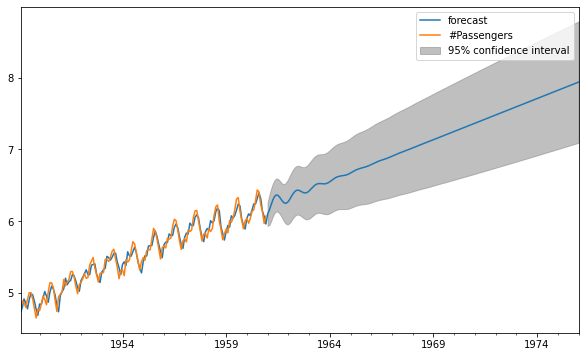

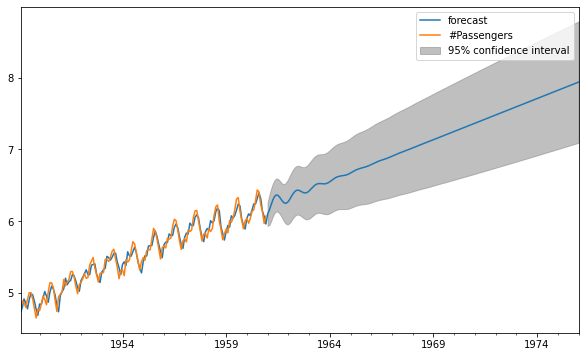

In [388]:
results_ARIMA.plot_predict(1,324)
#results_ARIMA.forecast(steps=180)